In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Riddhima.csv")

In [3]:
df

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[6435 rows x 8 columns]

In [4]:
unique_values = {}
for column in df.columns:
    unique_values[column] = df[column].unique()
for column, values in unique_values.items():
    print(column)
    print(values)

Store
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Date
['05-02-2010' '12-02-2010' '19-02-2010' '26-02-2010' '05-03-2010'
 '12-03-2010' '19-03-2010' '26-03-2010' '02-04-2010' '09-04-2010'
 '16-04-2010' '23-04-2010' '30-04-2010' '07-05-2010' '14-05-2010'
 '21-05-2010' '28-05-2010' '04-06-2010' '11-06-2010' '18-06-2010'
 '25-06-2010' '02-07-2010' '09-07-2010' '16-07-2010' '23-07-2010'
 '30-07-2010' '06-08-2010' '13-08-2010' '20-08-2010' '27-08-2010'
 '03-09-2010' '10-09-2010' '17-09-2010' '24-09-2010' '01-10-2010'
 '08-10-2010' '15-10-2010' '22-10-2010' '29-10-2010' '05-11-2010'
 '12-11-2010' '19-11-2010' '26-11-2010' '03-12-2010' '10-12-2010'
 '17-12-2010' '24-12-2010' '31-12-2010' '07-01-2011' '14-01-2011'
 '21-01-2011' '28-01-2011' '04-02-2011' '11-02-2011' '18-02-2011'
 '25-02-2011' '04-03-2011' '11-03-2011' '18-03-2011' '25-03-2011'
 '01-04-2011' '08-04-2011' '15-04-2011' '22-04-2011' '29-04

WE CAN INFER we are given the following features!!
   1) Store:ahows the store number
   2)  Date: shows the date in the format DD/MM/YY
   3)  Weekly Sales: shows total sales in given week.
   4)  Holiday Flag: a categorical feature shows if there was a holiday at that week(0:no holiday, 1:holiday)
   5)  Fuel Price: Cost of fuel in the region
   6)  CPI: Consumer price index (mostly used to measure inflation or deflation)
   7)  Unemployment: unemployment rate 

In [5]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [6]:
df.describe()

Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000

In [7]:
df.shape

(6435, 8)

In [8]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [9]:
df.duplicated().sum()

0

In [10]:
df['Date'] = pd.to_datetime(df['Date'])
# ,format="%Y-%m-%d"

C:\Users\Riddhima\AppData\Local\Temp\ipykernel_17512\2510302702.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [11]:
#verifying if datatype is changed!
df.Date.info()

<class 'pandas.core.series.Series'>
RangeIndex: 6435 entries, 0 to 6434
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
6435 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 50.4 KB


In [12]:
#creating new columns to access month and year indivisually!
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Week'] = df['Date'].dt.isocalendar().week
df.head(5)

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-05-02    1643690.90             0        42.31       2.572   
1      1 2010-12-02    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-05-03    1554806.68             0        46.50       2.625   

          CPI  Unemployment  Month  Year  Week  
0  211.096358         8.106      5  2010    17  
1  211.242170         8.106     12  2010    48  
2  211.289143         8.106      2  2010     7  
3  211.319643         8.106      2  2010     8  
4  211.350143         8.106      5  2010    18

In [13]:
a=df.corr(numeric_only=True)
a

Store  Weekly_Sales  Holiday_Flag  Temperature  \
Store         1.000000e+00     -0.335332 -4.386841e-16    -0.022659   
Weekly_Sales -3.353320e-01      1.000000  3.689097e-02    -0.063810   
Holiday_Flag -4.386841e-16      0.036891  1.000000e+00    -0.155091   
Temperature  -2.265908e-02     -0.063810 -1.550913e-01     1.000000   
Fuel_Price    6.002295e-02      0.009464 -7.834652e-02     0.144982   
CPI          -2.094919e-01     -0.072634 -2.162091e-03     0.176888   
Unemployment  2.235313e-01     -0.106176  1.096028e-02     0.101158   
Month         6.289676e-16      0.067535  3.322341e-01     0.066440   
Year          3.474318e-12     -0.018378 -5.678257e-02     0.064269   
Week          1.038488e-15      0.066105  3.288032e-01     0.073187   

              Fuel_Price       CPI  Unemployment         Month          Year  \
Store           0.060023 -0.209492      0.223531  6.289676e-16  3.474318e-12   
Weekly_Sales    0.009464 -0.072634     -0.106176  6.753523e-02 -1.837754e-02   
Holiday_Flag   -0.078347 -0.002162      0.010960  3.322341e-01 -5.678257e-02   
Temperature     0.144982  0.176888      0.101158  6.643970e-02  6.426923e-02   
Fuel_Price      1.000000 -0.170642     -0.034684 -5.283174e-02  7.794703e-01   
CPI            -0.170642  1.000000     -0.302020  1.478843e-03  7.479573e-02   
Unemployment   -0.034684 -0.302020      1.000000 -2.061552e-03 -2.418135e-01   
Month          -0.052832  0.001479     -0.002062  1.000000e+00 -1.390145e-01   
Year            0.779470  0.074796     -0.241813 -1.390145e-01  1.000000e+00   
Week           -0.041938  0.002783     -0.006038  9.964777e-01 -1.269874e-01   

                      Week  
Store         1.038488e-15  
Weekly_Sales  6.610484e-02  
Holiday_Flag  3.288032e-01  
Temperature   7.318701e-02  
Fuel_Price   -4.193804e-02  
CPI           2.782979e-03  
Unemployment -6.038021e-03  
Month         9.964777e-01  
Year         -1.269874e-01  
Week          1.000000e+00

SHOWS THE CORREALTION BETWEEN ALL VARIABLE IN THE DATAFRAME!
WE CAN CLEARLY SEE THAT THERE IS NO DIRECT CORREALTION BETWEEN ANY TWO VARIABLES.

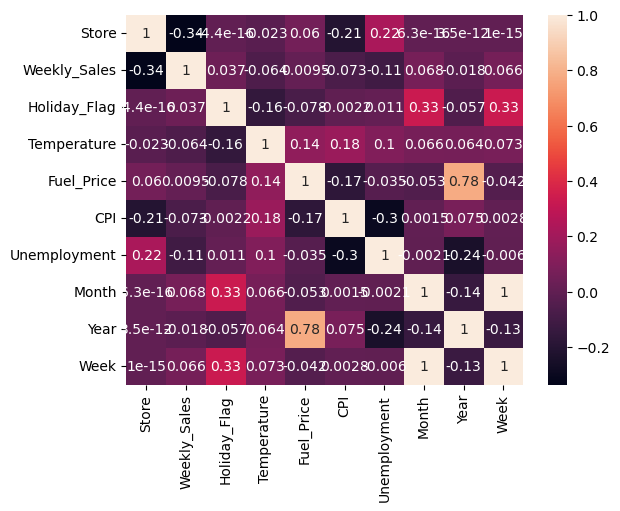

In [14]:
sns.heatmap(a,annot=True)
plt.show()

OBSERVATIONS TILL NOW:-
   1) Total records=6435
   2) Total features/columns =8
   3) Total Datatypes=8                                                                                                                           
                      7-numeric
                      1-object(data)(#will convert that)
   4) NULL values=0(all non-null values)
   5) Corelation between variables- with thh help of heatmap and the coorelation matrix, we can easily interpret that there is no corelation between any two variables. exceept for the correalation between fuel price and year.

UNIVARIATE ANALYSIS

<Axes: xlabel='Weekly_Sales', ylabel='Count'>

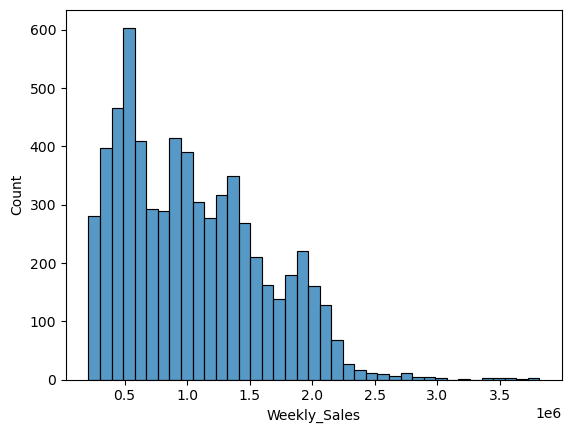

In [15]:
sns.histplot(df['Weekly_Sales']) 
#(distplot is deprecated in the updated version, use histplot or displot)

HISTOGRAM IS RIGHT SKEWED

THIS MEANS THAT THERE IS VERY LESS FREQUENCY OF VERY HIGH WEEKLY SALES

In [16]:
d3=df.groupby('Year',as_index=False)['Weekly_Sales'].mean()
d3

Year  Weekly_Sales
0  2010  1.059670e+06
1  2011  1.046239e+06
2  2012  1.033660e+06

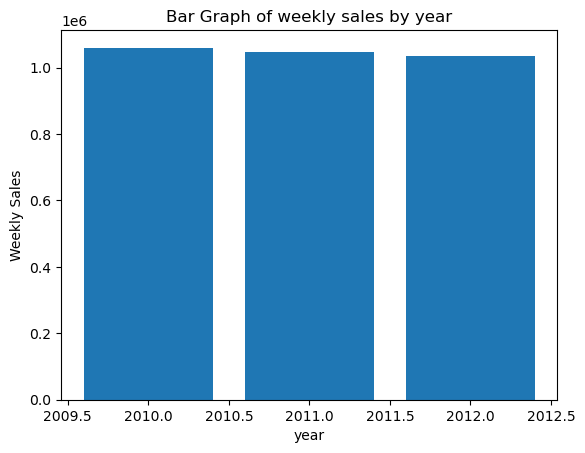

In [17]:
plt.bar(d3['Year'], d3['Weekly_Sales'])
plt.xlabel('year')
plt.ylabel('Weekly Sales')
plt.title('Bar Graph of weekly sales by year')
plt.show()

THERE IS A VERY SMALL  DECREASE IN WEEKLY SALES WHEN COMPARED WITH INCREASING YEARS.

<Axes: xlabel='Year', ylabel='Weekly_Sales'>

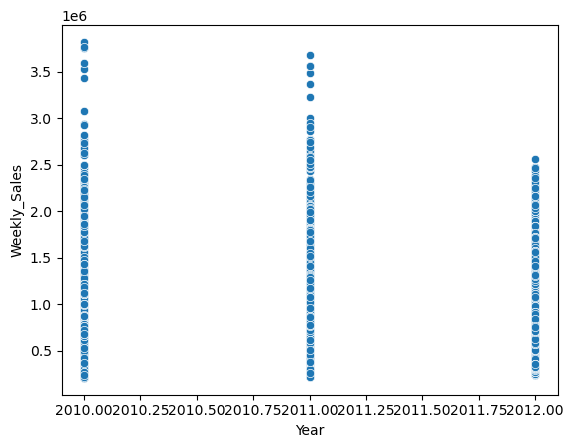

In [18]:
sns.scatterplot(x='Year',y='Weekly_Sales',data=df)

WE CLEARLY SEE THAT FROM 2010 TO 2011 SALES WENT DOWN GRADUALLY BUT FROM 2011 TO 2012 IT WENT DOWN DRASTICALLY!!

In [19]:
d1=df.groupby('Month',as_index=False)['Weekly_Sales'].mean()
d1

Month  Weekly_Sales
0       1  9.476139e+05
1       2  1.054597e+06
2       3  1.024975e+06
3       4  1.024324e+06
4       5  1.035379e+06
5       6  1.064848e+06
6       7  1.014212e+06
7       8  1.044874e+06
8       9  1.009457e+06
9      10  1.030631e+06
10     11  1.133751e+06
11     12  1.210255e+06

<Axes: xlabel='Month', ylabel='Weekly_Sales'>

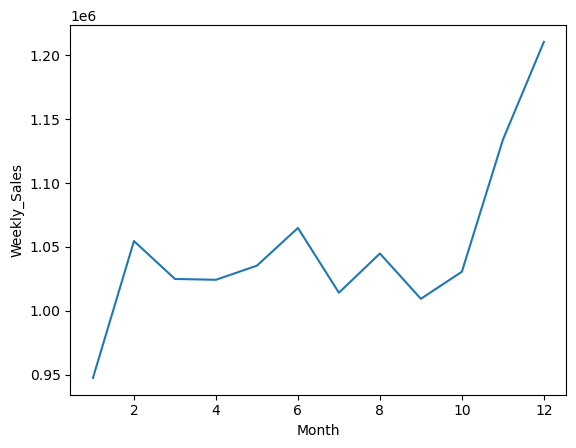

In [20]:
sns.lineplot(x='Month',y='Weekly_Sales',data=d1)

THE SALES WERE LESS IN THE MONTH OF JANUARY AND THEN NORMAL AT THE TIME OF OTHER MONTHS BUT SPIKED AT THE TIME OF DECEMBER...WE NEED TO FIND A REASON FOR THAT.

FOR VISUALISING IT BETTER LETS PLOT A BAR GRAPH.

Text(0.5, 1.0, 'Bar Graph of weekly sales by month')

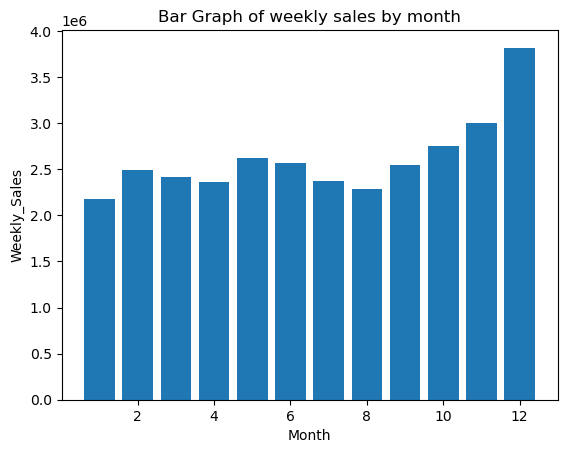

In [21]:
plt.bar(df['Month'], df['Weekly_Sales'])
plt.xlabel('Month')
plt.ylabel('Weekly_Sales')
plt.title('Bar Graph of weekly sales by month')

IT IS CLEARLY VISIBLE THAT WEEKLY SALES ARE HIGHEST IN MONTH OF DECEMBER AND LOWEST IN JANUARY

<Axes: xlabel='Month', ylabel='Weekly_Sales'>

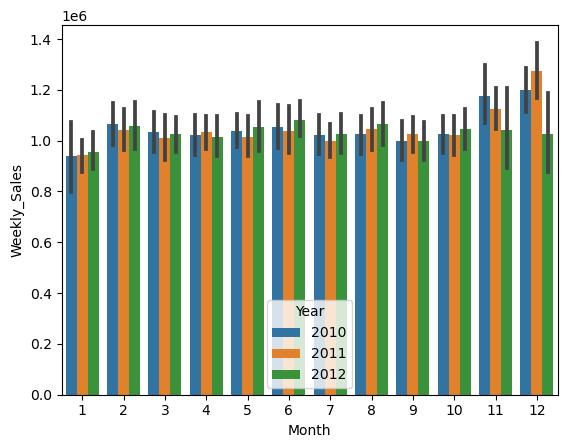

In [39]:
sns.barplot(x='Month',y='Weekly_Sales',hue='Year',data=df)

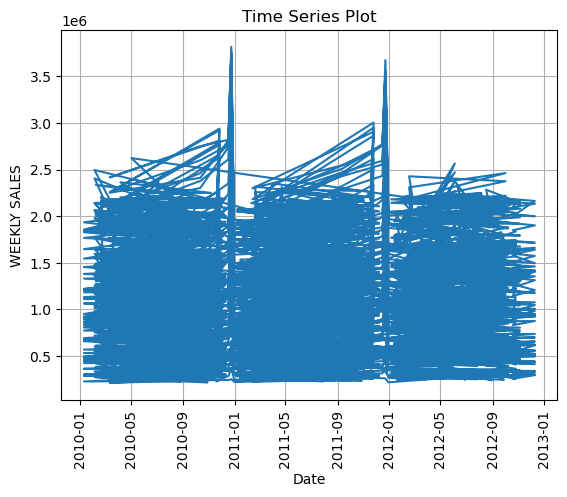

In [31]:
# plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Weekly_Sales'])
plt.xticks(rotation=90)
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('WEEKLY SALES')
plt.grid(True)
plt.show()

<Axes: xlabel='Date', ylabel='Weekly_Sales'>

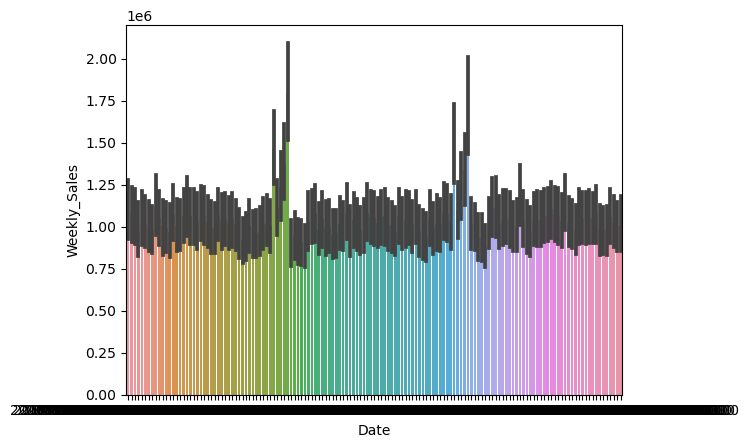

In [30]:
sns.barplot(x='Date',y='Weekly_Sales',data=df)

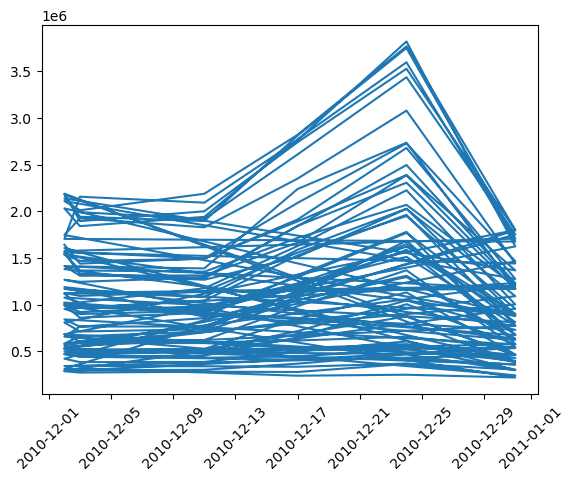

In [32]:
month_data = df[(df['Date'].dt.month == 12) & (df['Date'].dt.year == 2010)]
plt.xticks(rotation=45)
plt.plot(month_data['Date'],month_data['Weekly_Sales'])

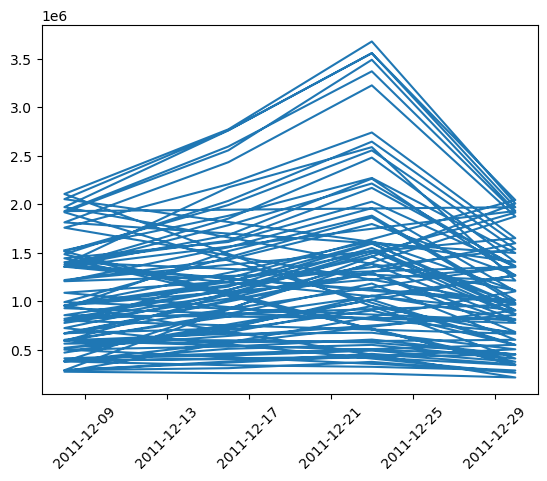

In [33]:
month_data = df[(df['Date'].dt.month == 12) & (df['Date'].dt.year == 2011)]
plt.xticks(rotation=45)
plt.plot(month_data['Date'],month_data['Weekly_Sales'])

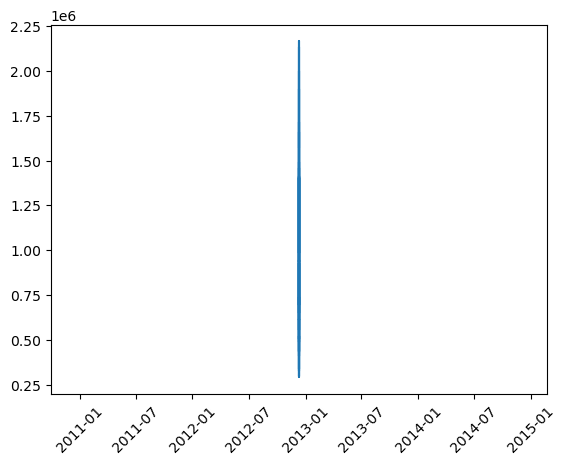

In [34]:
month_data = df[(df['Date'].dt.month == 12) & (df['Date'].dt.year == 2012)]
plt.xticks(rotation=45)
plt.plot(month_data['Date'],month_data['Weekly_Sales'])

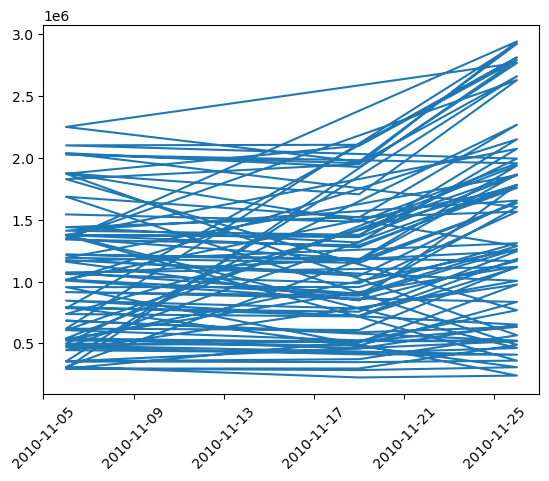

In [58]:
month_data = df[(df['Date'].dt.month == 11) & (df['Date'].dt.year == 2010)]
plt.xticks(rotation=45)
plt.plot(month_data['Date'],month_data['Weekly_Sales'])

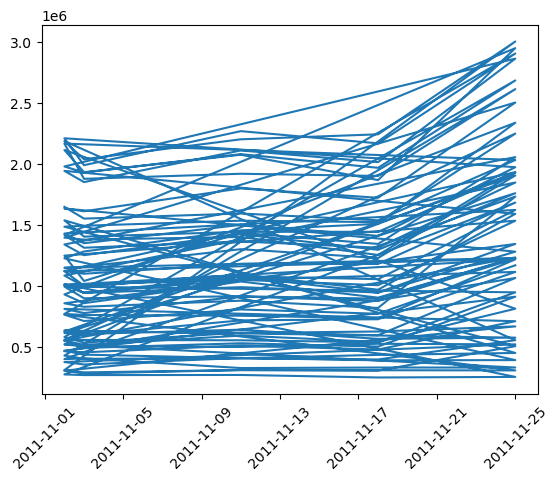

In [59]:
month_data = df[(df['Date'].dt.month == 11) & (df['Date'].dt.year == 2011)]
plt.xticks(rotation=45)
plt.plot(month_data['Date'],month_data['Weekly_Sales'])

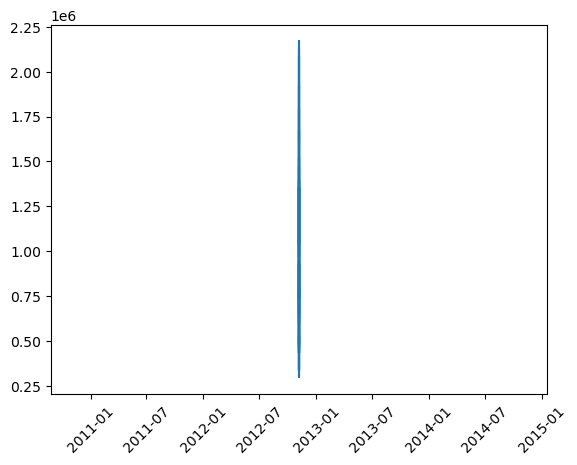

In [60]:
month_data = df[(df['Date'].dt.month == 11) & (df['Date'].dt.year == 2012)]
plt.xticks(rotation=45)
plt.plot(month_data['Date'],month_data['Weekly_Sales'])

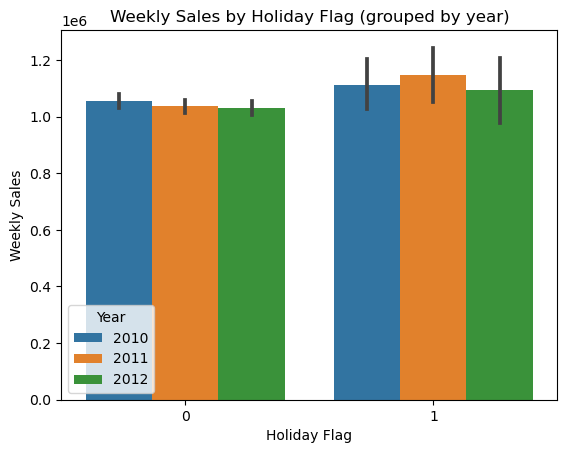

In [61]:
sns.barplot(x='Holiday_Flag', y='Weekly_Sales', hue='Year', data=df)
plt.xlabel('Holiday Flag')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales by Holiday Flag (grouped by year)')
plt.show()

WHEN HOLIDAY_FLAG IS 0 THAT MEANS ,NO HOLIDAY, THE WEEKLY SALES ARE LESS BUT WHEN IT IS 1...WHICH MEANS, THERE IS HOLIDAY, WEEKLY SALES ARE HIGH!!

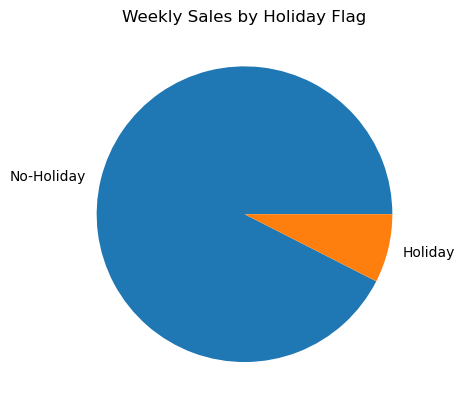

In [23]:
sales_by_holiday = df.groupby('Holiday_Flag')['Weekly_Sales'].sum()
plt.pie(sales_by_holiday, labels=['No-Holiday', 'Holiday'])
plt.title('Weekly Sales by Holiday Flag')
plt.show()

In [24]:
d1=df.groupby('Store',as_index=False)['Weekly_Sales'].sum()
d1

Store  Weekly_Sales
0       1  2.224028e+08
1       2  2.753824e+08
2       3  5.758674e+07
3       4  2.995440e+08
4       5  4.547569e+07
5       6  2.237561e+08
6       7  8.159828e+07
7       8  1.299512e+08
8       9  7.778922e+07
9      10  2.716177e+08
10     11  1.939628e+08
11     12  1.442872e+08
12     13  2.865177e+08
13     14  2.889999e+08
14     15  8.913368e+07
15     16  7.425243e+07
16     17  1.277821e+08
17     18  1.551147e+08
18     19  2.066349e+08
19     20  3.013978e+08
20     21  1.081179e+08
21     22  1.470756e+08
22     23  1.987506e+08
23     24  1.940160e+08
24     25  1.010612e+08
25     26  1.434164e+08
26     27  2.538559e+08
27     28  1.892637e+08
28     29  7.714155e+07
29     30  6.271689e+07
30     31  1.996139e+08
31     32  1.668192e+08
32     33  3.716022e+07
33     34  1.382498e+08
34     35  1.315207e+08
35     36  5.341221e+07
36     37  7.420274e+07
37     38  5.515963e+07
38     39  2.074455e+08
39     40  1.378703e+08
40     41  1.813419e+08
41     42  7.956575e+07
42     43  9.056544e+07
43     44  4.329309e+07
44     45  1.123953e+08

<Axes: xlabel='Store', ylabel='Weekly_Sales'>

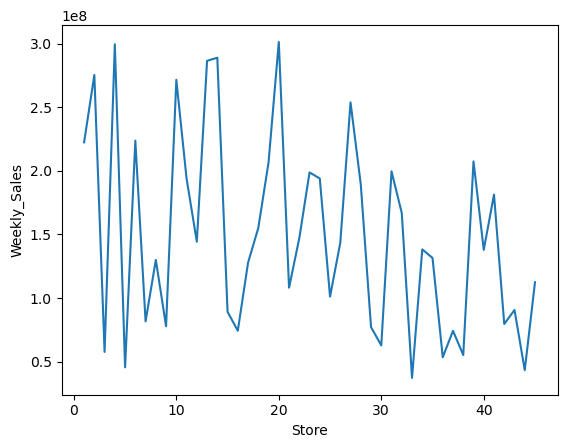

In [25]:
sns.lineplot(x='Store',y='Weekly_Sales',data=d1)

Text(0.5, 1.0, 'Bar Graph of weekly sales by Store')

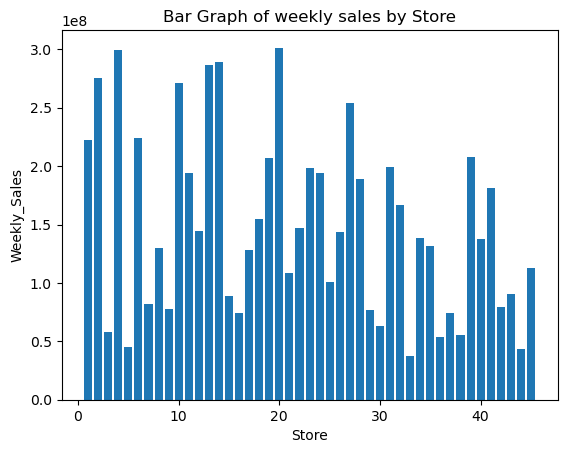

In [27]:
plt.bar(d1['Store'], d1['Weekly_Sales'])
plt.xlabel('Store')
plt.ylabel('Weekly_Sales')
plt.title('Bar Graph of weekly sales by Store')

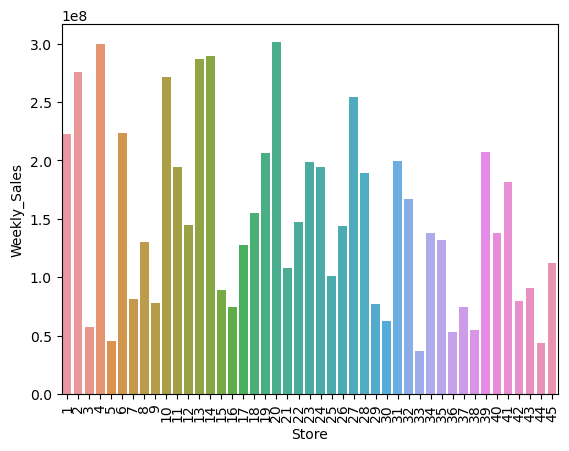

<Figure size 2000x1000 with 0 Axes>

In [28]:
sns.barplot(x='Store',y='Weekly_Sales',data=d1)
plt.xticks(rotation=90)
plt.figure(figsize=(20,10))
plt.show()

STORE 4 AND 20 HAVE HIGHEST WEEKLY_SALES AND STORE 33 HAS LOWEST WEEKLY SALES

<Axes: xlabel='Year', ylabel='Weekly_Sales'>

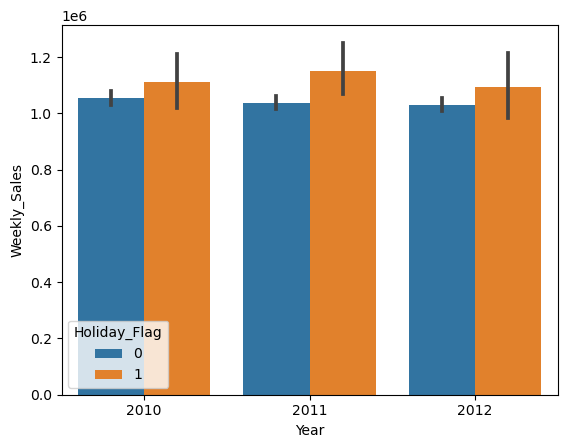

In [29]:
sns.barplot(x='Year',y='Weekly_Sales',hue='Holiday_Flag',data=df)

<Axes: xlabel='Year', ylabel='Fuel_Price'>

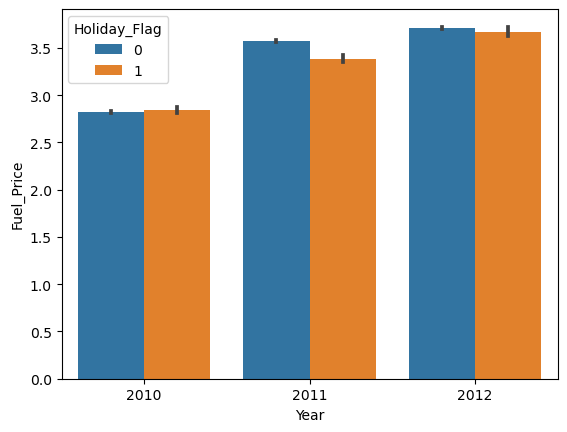

In [35]:
sns.barplot(x='Year',y='Fuel_Price',hue='Holiday_Flag',data=df)

The given barplot helps us deduce that the fuel price increases over the years 2010,2011 and 2012
but no pattern can be observed over holiday flags for the increase or decrease of fuel price!!

<Axes: xlabel='Store', ylabel='Unemployment'>

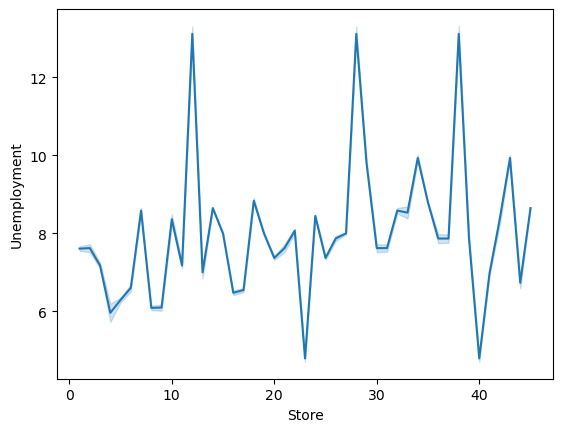

In [36]:
sns.lineplot(x='Store',y='Unemployment',data=df)

<Axes: xlabel='Store', ylabel='Unemployment'>

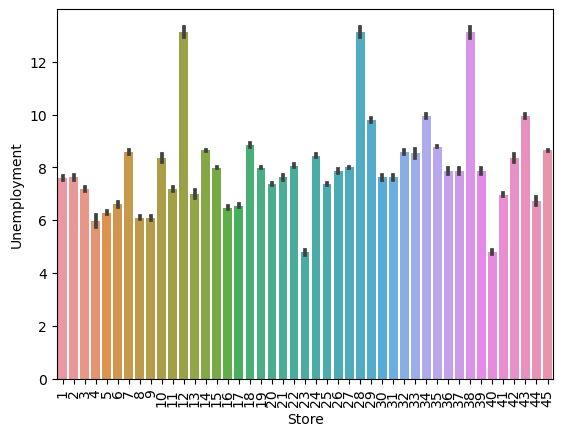

In [37]:
plt.xticks(rotation=90)
sns.barplot(x='Store',y='Unemployment',data=df)

we get to know that store number 12,28 and 38 have the highest unemployment rate and
store number 23 and 40 have lowest umployment rate!!

<Axes: xlabel='Year', ylabel='Unemployment'>

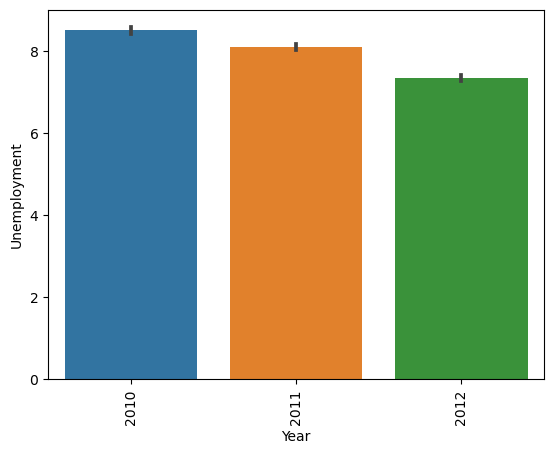

In [38]:
plt.xticks(rotation=90)
sns.barplot(x='Year',y='Unemployment',data=df)
# sns.barplot(df['Year'],df['Unemployment'])

WE CAN CLEARLY SEE THAT UNEMPLOMENT RATE HAS DCREASED OVER YEARS!

In [40]:
df ["Temperature"].describe()

count    6435.000000
mean       60.663782
std        18.444933
min        -2.060000
25%        47.460000
50%        62.670000
75%        74.940000
max       100.140000
Name: Temperature, dtype: float64

In [41]:
print(df['Temperature'].unique())

[42.31 38.51 39.93 ... 75.87 77.55 74.09]


<Axes: xlabel='Temperature', ylabel='Count'>

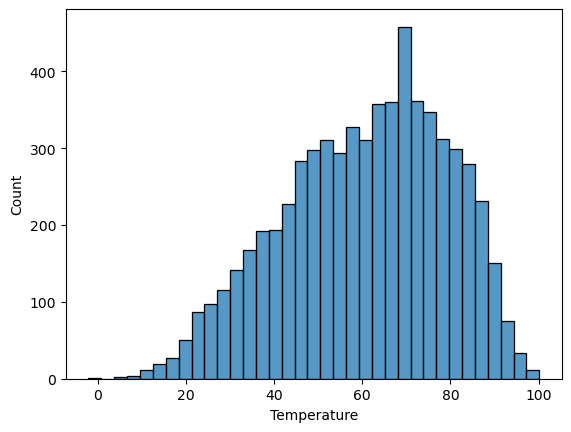

In [42]:
sns.histplot(df['Temperature']) 

In [43]:
df['Temperature'].skew()

-0.3367676011075799

<Axes: xlabel='Temperature', ylabel='Weekly_Sales'>

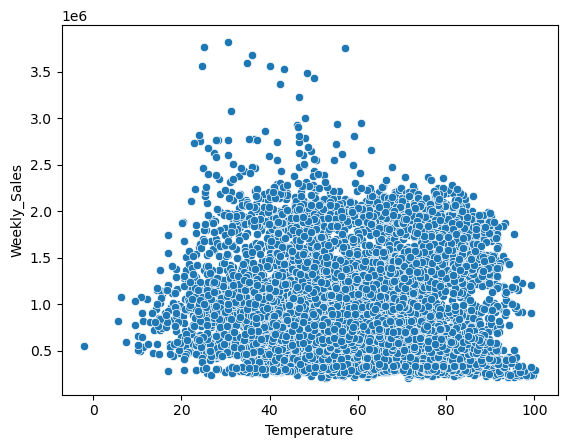

In [44]:
sns.scatterplot(x='Temperature',y='Weekly_Sales',data=df)

<Axes: xlabel='Temperature', ylabel='Weekly_Sales'>

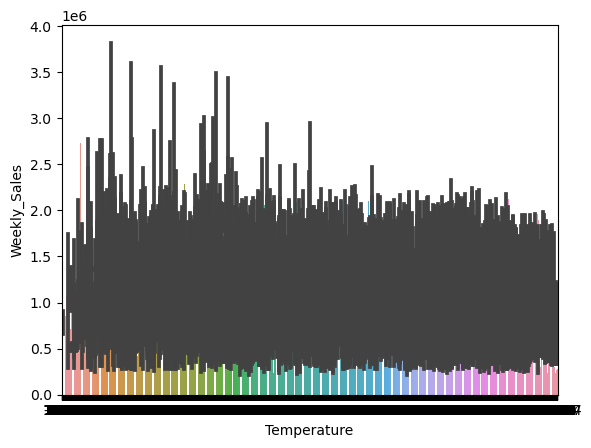

In [45]:
sns.barplot(x='Temperature',y='Weekly_Sales',data=df)

<Axes: >

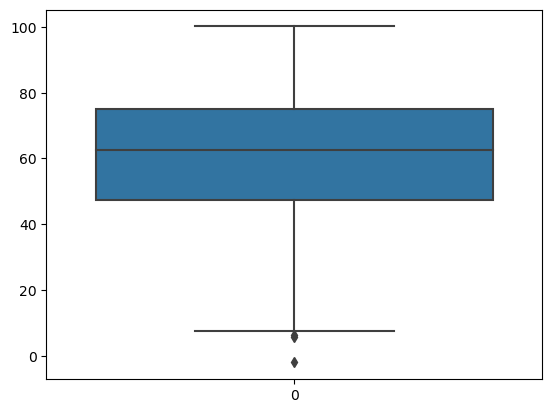

In [46]:
sns.boxplot(df['Temperature'])

In [47]:
temperature_ranges = [-20, 20 , 40 ,60 ,80 ,100, 120] 
categories = [1, 2, 3, 4, 5, 6 ]
df['temp_category'] = pd.cut(df['Temperature'], bins=temperature_ranges, labels=categories,include_lowest=True)
df

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1 2010-05-02    1643690.90             0        42.31       2.572   
1         1 2010-12-02    1641957.44             1        38.51       2.548   
2         1 2010-02-19    1611968.17             0        39.93       2.514   
3         1 2010-02-26    1409727.59             0        46.63       2.561   
4         1 2010-05-03    1554806.68             0        46.50       2.625   
...     ...        ...           ...           ...          ...         ...   
6430     45 2012-09-28     713173.95             0        64.88       3.997   
6431     45 2012-05-10     733455.07             0        64.89       3.985   
6432     45 2012-12-10     734464.36             0        54.47       4.000   
6433     45 2012-10-19     718125.53             0        56.47       3.969   
6434     45 2012-10-26     760281.43             0        58.85       3.882   

             CPI  Unemployment  Month  Year  Week temp_category  
0     211.096358         8.106      5  2010    17             3  
1     211.242170         8.106     12  2010    48             2  
2     211.289143         8.106      2  2010     7             2  
3     211.319643         8.106      2  2010     8             3  
4     211.350143         8.106      5  2010    18             3  
...          ...           ...    ...   ...   ...           ...  
6430  192.013558         8.684      9  2012    39             4  
6431  192.170412         8.667      5  2012    19             4  
6432  192.327265         8.667     12  2012    50             3  
6433  192.330854         8.667     10  2012    42             3  
6434  192.308899         8.667     10  2012    43             3  

[6435 rows x 12 columns]

In [48]:
d6=df.groupby('temp_category',as_index=False)['Weekly_Sales'].sum()
d6

temp_category  Weekly_Sales
0             1  7.274178e+07
1             2  9.967585e+08
2             3  2.086474e+09
3             4  2.585491e+09
4             5  9.951751e+08
5             6  5.786913e+05

<Axes: xlabel='temp_category', ylabel='Weekly_Sales'>

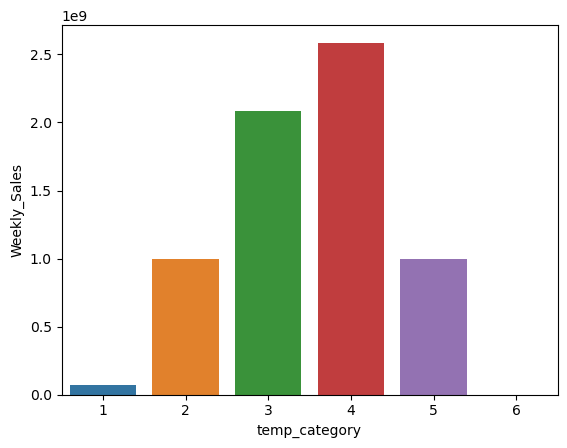

In [49]:
sns.barplot(x='temp_category',y='Weekly_Sales',data=d6)

In [50]:
df['temp_category'].value_counts()

4    2441
3    1948
5    1055
2     903
1      86
6       2
Name: temp_category, dtype: int64

In [51]:
d7=df.groupby('Year',as_index=False)['CPI'].sum()
d7

Year            CPI
0  2010  363099.848068
1  2011  401416.975385
2  2012  339590.140964

<Axes: xlabel='Year', ylabel='CPI'>

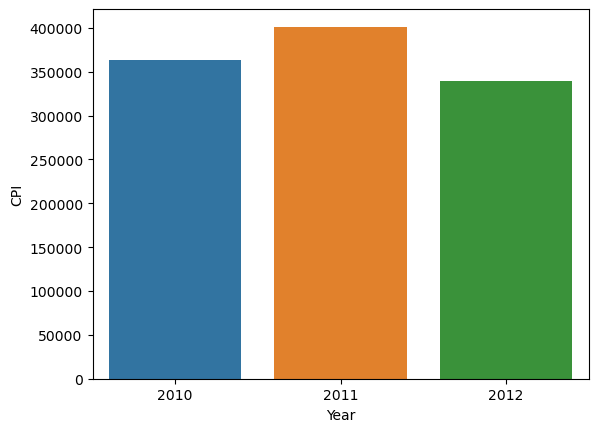

In [52]:
sns.barplot(x='Year',y='CPI',data=d7)

SHOWS THE INFLATION IN 2011 AND AGAIN DEFLATION IN 2012

In [64]:
d8=df.groupby('Month',as_index=False)['CPI'].sum()
d8

Month            CPI
0       1   77203.131371
1       2   84647.368406
2       3   92727.609658
3       4  107947.908163
4       5   99944.805375
5       6   93153.049690
6       7  100392.712862
7       8   92811.171347
8       9  100749.027661
9      10  100609.787184
10     11   69321.250277
11     12   84599.142420

<Axes: xlabel='Month', ylabel='CPI'>

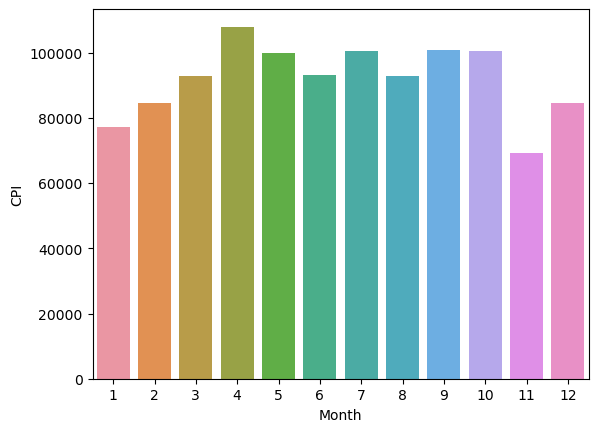

In [66]:
sns.barplot(x='Month',y='CPI',data=d8)

In [55]:
df

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1 2010-05-02    1643690.90             0        42.31       2.572   
1         1 2010-12-02    1641957.44             1        38.51       2.548   
2         1 2010-02-19    1611968.17             0        39.93       2.514   
3         1 2010-02-26    1409727.59             0        46.63       2.561   
4         1 2010-05-03    1554806.68             0        46.50       2.625   
...     ...        ...           ...           ...          ...         ...   
6430     45 2012-09-28     713173.95             0        64.88       3.997   
6431     45 2012-05-10     733455.07             0        64.89       3.985   
6432     45 2012-12-10     734464.36             0        54.47       4.000   
6433     45 2012-10-19     718125.53             0        56.47       3.969   
6434     45 2012-10-26     760281.43             0        58.85       3.882   

             CPI  Unemployment  Month  Year  Week temp_category  
0     211.096358         8.106      5  2010    17             3  
1     211.242170         8.106     12  2010    48             2  
2     211.289143         8.106      2  2010     7             2  
3     211.319643         8.106      2  2010     8             3  
4     211.350143         8.106      5  2010    18             3  
...          ...           ...    ...   ...   ...           ...  
6430  192.013558         8.684      9  2012    39             4  
6431  192.170412         8.667      5  2012    19             4  
6432  192.327265         8.667     12  2012    50             3  
6433  192.330854         8.667     10  2012    42             3  
6434  192.308899         8.667     10  2012    43             3  

[6435 rows x 12 columns]

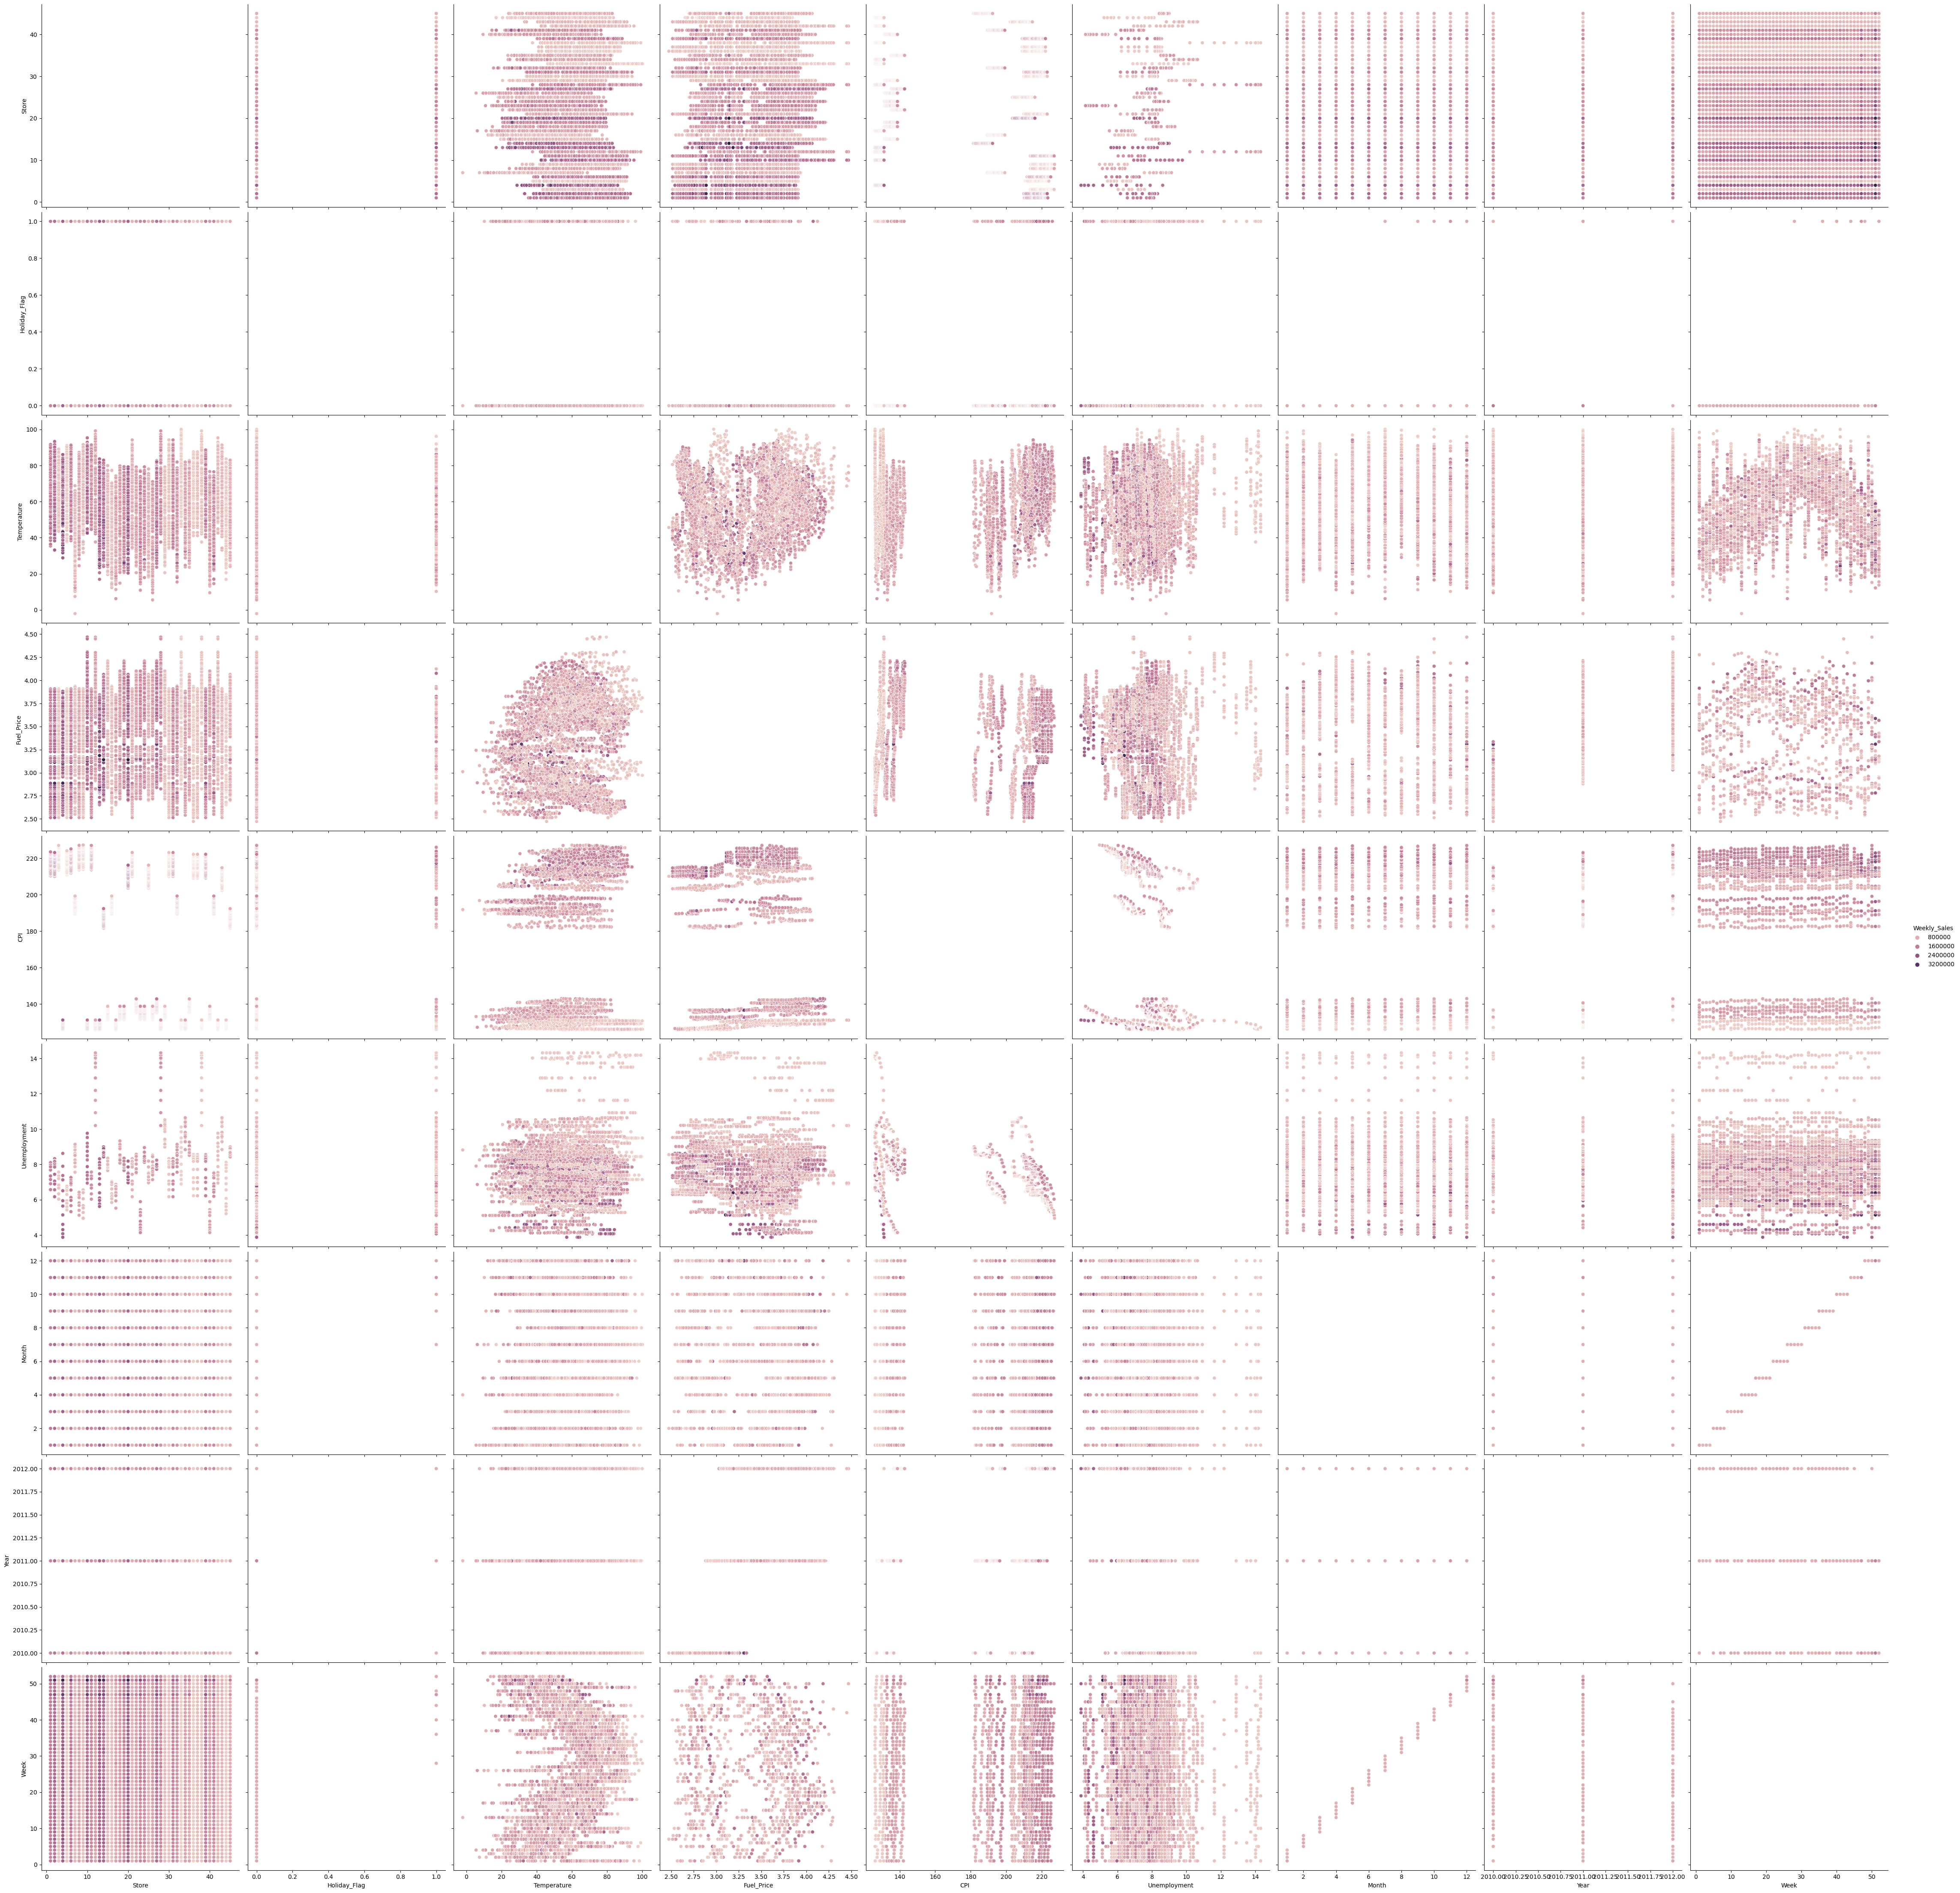

In [56]:
sns.pairplot(df,hue='Weekly_Sales',height=5)